In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import seaborn as sns

In [2]:
dataset=pd.read_csv('T1.csv')
dataset

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [3]:
dataset.isnull().any()

Date/Time                        False
LV ActivePower (kW)              False
Wind Speed (m/s)                 False
Theoretical_Power_Curve (KWh)    False
Wind Direction (°)               False
dtype: bool

Date/Time                        False
LV ActivePower (kW)              False
Wind Speed (m/s)                 False
Theoretical_Power_Curve (KWh)    False
Wind Direction (°)               False
dtype: bool

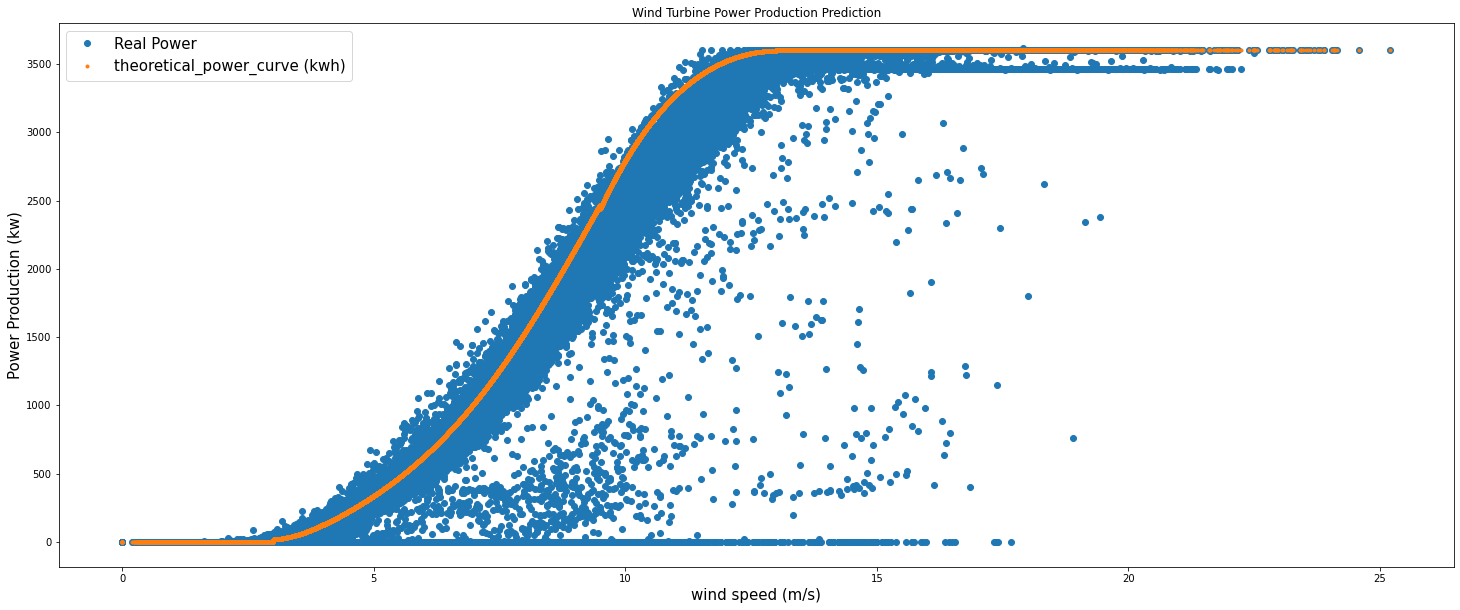

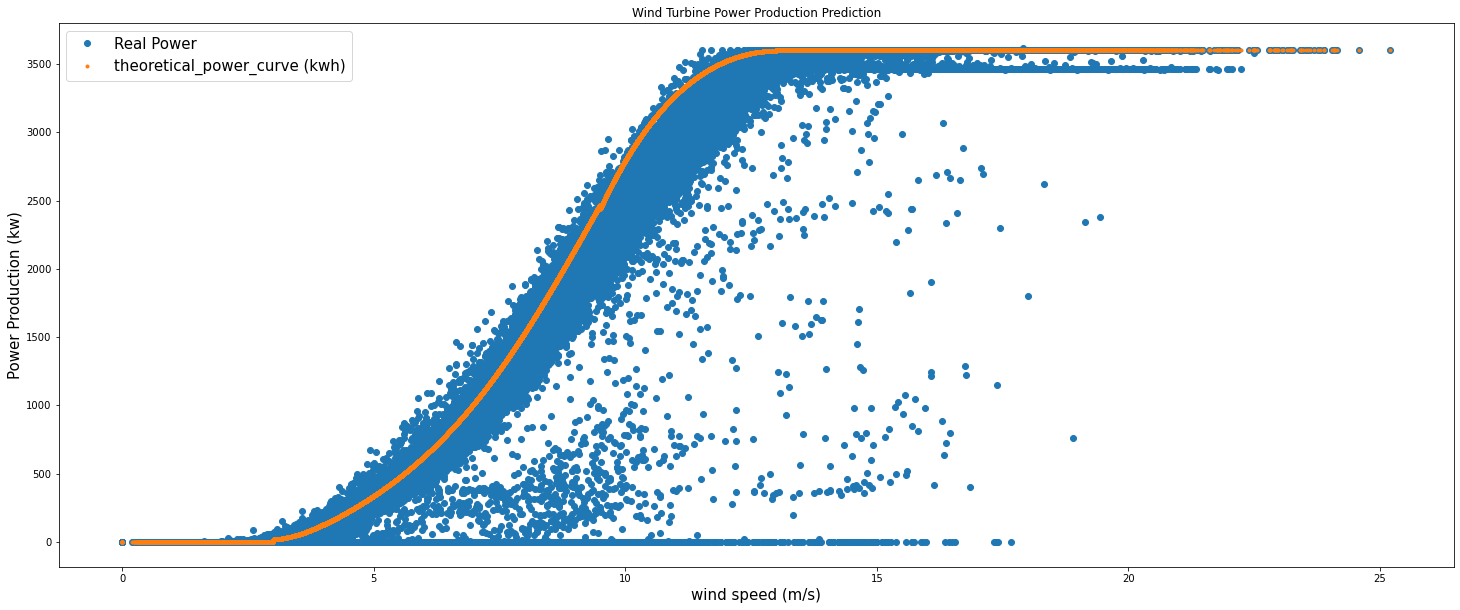

In [4]:

exp = dataset['LV ActivePower (kW)']
the = dataset['Theoretical_Power_Curve (KWh)']
plt.figure(figsize=(25,10)) 
plt.plot(dataset['Wind Speed (m/s)'], dataset['LV ActivePower (kW)'], 'o', label='Real Power')
plt.plot(dataset['Wind Speed (m/s)'], dataset['Theoretical_Power_Curve (KWh)'], '.', label='theoretical_power_curve (kwh)')
plt.xlabel('wind speed (m/s)', size=15)
plt.ylabel('Power Production (kw)', size=15)
plt.title('Wind Turbine Power Production Prediction')
plt.legend(fontsize=15)
plt.show()

In [5]:
# Importing a visualization library
! pip install windrose

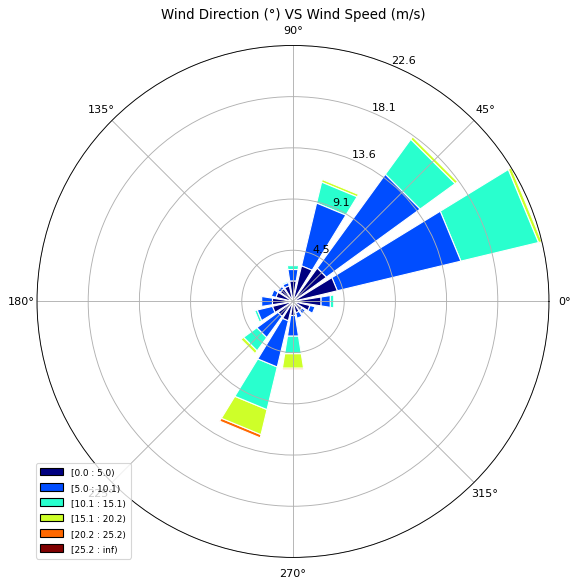

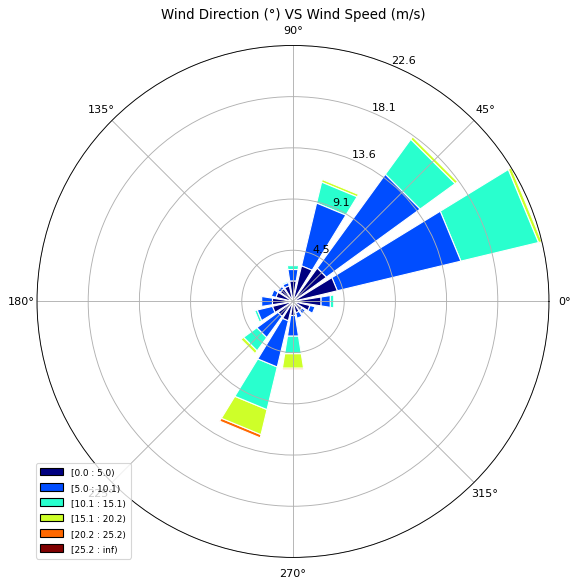

In [6]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(dataset['Wind Direction (°)'], dataset['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Direction (°) VS Wind Speed (m/s)")
plt.show()

<AxesSubplot:>

<AxesSubplot:>

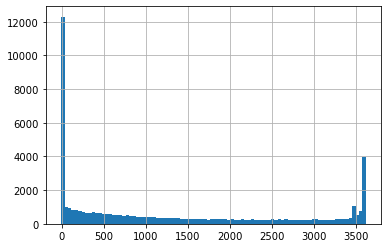

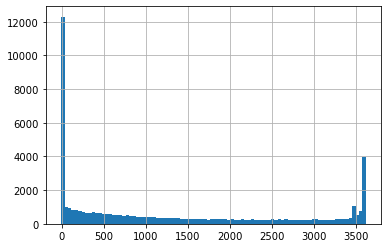

In [7]:
dataset['LV ActivePower (kW)'].hist(bins=90)

<AxesSubplot:>

<AxesSubplot:>

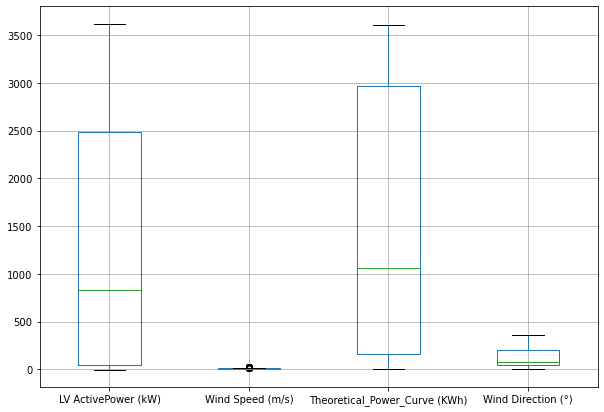

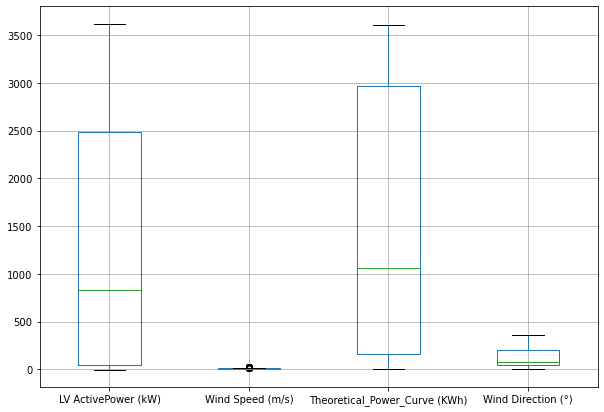

In [8]:
plt.figure(figsize = (10, 7))
dataset.boxplot()

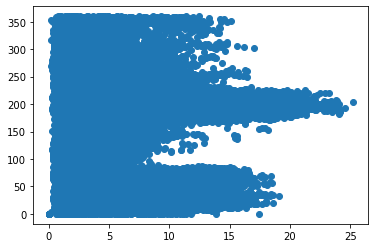

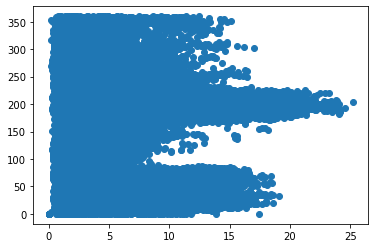

In [9]:
plt.scatter(dataset['Wind Speed (m/s)'],dataset['Wind Direction (°)'])

In [10]:
dataset.drop(['Date/Time'],axis=1,inplace=True)

C:\Users\Tripti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tripti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wind Direction (°)', ylabel='Density'>

<AxesSubplot:xlabel='Wind Direction (°)', ylabel='Density'>

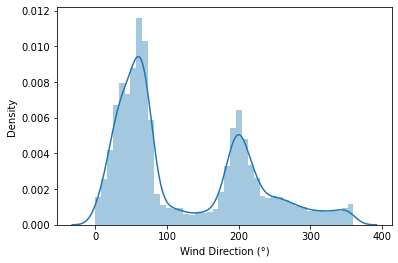

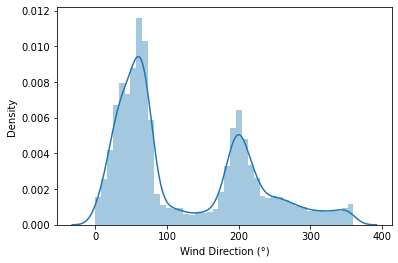

In [11]:
sns.distplot(dataset['Wind Direction (°)'].dropna())

In [12]:
dataset.drop(['Wind Direction (°)'],axis=1,inplace=True)

In [13]:
dataset.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
count,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463
std,1312.459242,4.227166,1368.018238
min,-2.471405,0.000000,0.000000
25%,50.677890,4.201395,161.328167
50%,825.838074,7.104594,1063.776283
75%,2482.507568,10.300020,2964.972462
max,3618.732910,25.206011,3600.000000


,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
count,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463
std,1312.459242,4.227166,1368.018238
min,-2.471405,0.000000,0.000000
25%,50.677890,4.201395,161.328167
50%,825.838074,7.104594,1063.776283
75%,2482.507568,10.300020,2964.972462
max,3618.732910,25.206011,3600.000000


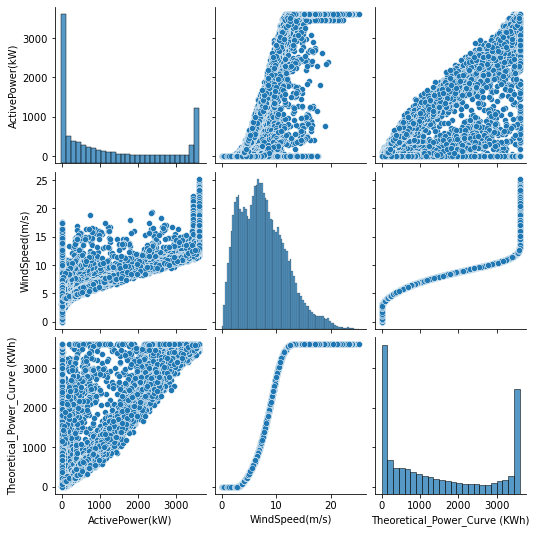

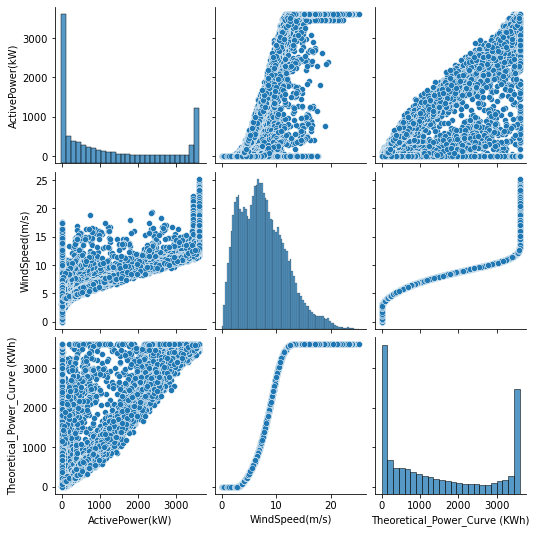

In [14]:
dataset.rename(columns={'Date/Time':'Time',
                   'LV ActivePower (kW)':'ActivePower(kW)',
                   "Wind Speed (m/s)":"WindSpeed(m/s)",
                   "Wind Direction (°)":"Wind_Direction"},
                    inplace=True)
sns.pairplot(dataset)

#The heat map clearly tells us that there's no realtion between wind direction and 
the Power generated but Wind speed, Theoritical power and Actual power generated 
have a very positive correlation

In [15]:
corr = dataset.corr()
plt.figure(figsize=(10, 8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

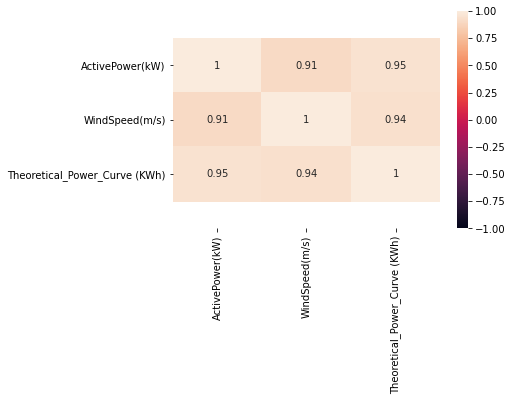

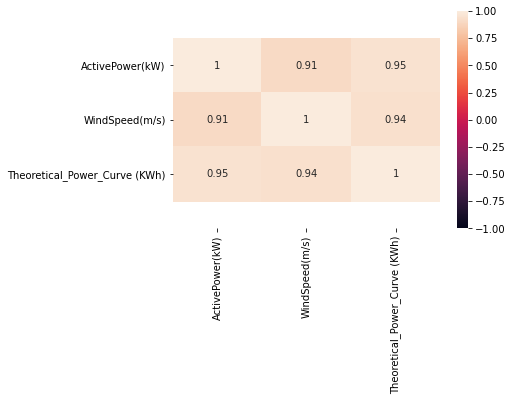

,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh)
ActivePower(kW),1.000000,0.912774,0.949918
WindSpeed(m/s),0.912774,1.000000,0.944209
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000


,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh)
ActivePower(kW),1.000000,0.912774,0.949918
WindSpeed(m/s),0.912774,1.000000,0.944209
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000


In [16]:
ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

In [17]:
#sns.distplot(dataset)

C:\Users\Tripti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tripti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WindSpeed(m/s)'>

<AxesSubplot:xlabel='WindSpeed(m/s)'>

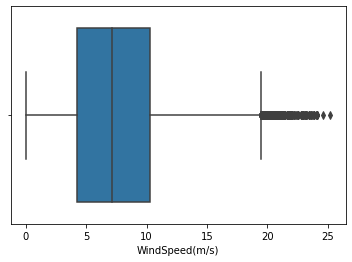

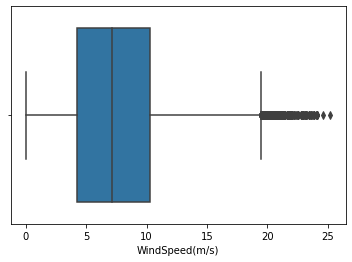

In [18]:
sns.boxplot(dataset['WindSpeed(m/s)'])

C:\Users\Tripti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tripti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ActivePower(kW)'>

<AxesSubplot:xlabel='ActivePower(kW)'>

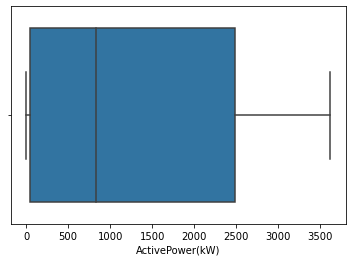

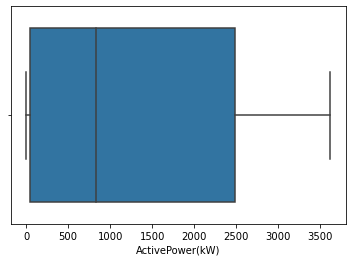

In [19]:
sns.boxplot(dataset['ActivePower(kW)'])

C:\Users\Tripti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tripti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Theoretical_Power_Curve (KWh)'>

<AxesSubplot:xlabel='Theoretical_Power_Curve (KWh)'>

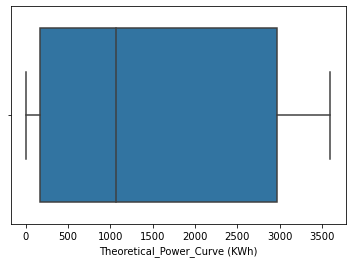

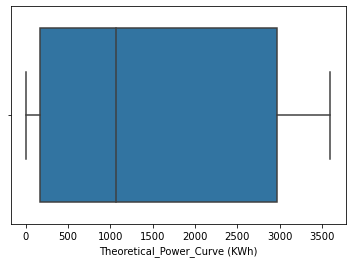

In [20]:
sns.boxplot(dataset['Theoretical_Power_Curve (KWh)'])

In [21]:
from scipy import stats

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ActivePower(kW)                50530 non-null  float64
 1   WindSpeed(m/s)                 50530 non-null  float64
 2   Theoretical_Power_Curve (KWh)  50530 non-null  float64
dtypes: float64(3)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ActivePower(kW)                50530 non-null  float64
 1   WindSpeed(m/s)                 50530 non-null  float64
 2   Theoretical_Power_Curve (KWh)  50530 non-null  float64
dtypes: float64(3)
memory usage: 1.2 MB


In [23]:
z=np.abs(stats.zscore(dataset))
z

array([[0.70679964, 0.53147626, 0.78643484],
       [0.65062865, 0.44611545, 0.71071243],
       [0.76293238, 0.55402096, 0.80502315],
       ...,
       [0.68073081, 0.20756566, 0.21645342],
       [0.92042608, 0.44082298, 0.6770496 ],
       [1.1526428 , 0.57281963, 0.94079255]])

array([[0.70679964, 0.53147626, 0.78643484],
       [0.65062865, 0.44611545, 0.71071243],
       [0.76293238, 0.55402096, 0.80502315],
       ...,
       [0.68073081, 0.20756566, 0.21645342],
       [0.92042608, 0.44082298, 0.6770496 ],
       [1.1526428 , 0.57281963, 0.94079255]])

In [24]:
threshold=3
np.where(z>threshold)

(array([ 2407,  2408,  2410,  2411,  2412,  2413,  2414,  2415,  2416,
         2436,  2437,  2438,  2439,  2444,  2747,  2748,  2849,  2851,
         2856,  2857,  2858,  2859,  2860,  2861,  3949,  3950,  3951,
         3952,  3953,  3954,  3955,  3961,  3962,  3965,  3966,  3967,
         3968,  3969,  3970,  3971,  3972,  3976,  3977,  3979,  3980,
         3982,  3983,  3984,  3985,  3986,  3987,  3988,  3989,  3990,
         3991,  3992,  3993,  3994,  3995,  3996,  4003,  4006,  4007,
         4025,  4026,  4139,  4140,  4141,  4156,  4157,  4179,  4208,
         4210,  4217,  4218,  4219,  4220,  4223,  4225,  4226,  4227,
         4228,  4229,  4230,  4231,  4232,  4233,  4234,  4235,  4236,
         4237,  4238,  4239,  4240,  4241,  4242,  4243,  4244,  4245,
         4246,  4247,  4248,  4249,  4250,  4251,  4252,  4253,  4254,
         4255,  4256,  4257,  4258,  4259,  4260,  4261,  4262,  4263,
         4266,  4267,  4268,  4270,  4272,  4274,  4275,  4276,  4277,
      

(array([ 2407,  2408,  2410,  2411,  2412,  2413,  2414,  2415,  2416,
         2436,  2437,  2438,  2439,  2444,  2747,  2748,  2849,  2851,
         2856,  2857,  2858,  2859,  2860,  2861,  3949,  3950,  3951,
         3952,  3953,  3954,  3955,  3961,  3962,  3965,  3966,  3967,
         3968,  3969,  3970,  3971,  3972,  3976,  3977,  3979,  3980,
         3982,  3983,  3984,  3985,  3986,  3987,  3988,  3989,  3990,
         3991,  3992,  3993,  3994,  3995,  3996,  4003,  4006,  4007,
         4025,  4026,  4139,  4140,  4141,  4156,  4157,  4179,  4208,
         4210,  4217,  4218,  4219,  4220,  4223,  4225,  4226,  4227,
         4228,  4229,  4230,  4231,  4232,  4233,  4234,  4235,  4236,
         4237,  4238,  4239,  4240,  4241,  4242,  4243,  4244,  4245,
         4246,  4247,  4248,  4249,  4250,  4251,  4252,  4253,  4254,
         4255,  4256,  4257,  4258,  4259,  4260,  4261,  4262,  4263,
         4266,  4267,  4268,  4270,  4272,  4274,  4275,  4276,  4277,
      

In [25]:
dataset_withoutlayers=dataset[(z<=3).all(axis=1)]
dataset_withoutlayers

,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh)
0,380.047791,5.311336,416.328908
1,453.769196,5.672167,519.917511
2,306.376587,5.216037,390.900016
3,419.645905,5.659674,516.127569
4,380.650696,5.577941,491.702972
...,...,...,...
50525,2963.980957,11.404030,3397.190793
50526,1684.353027,7.332648,1173.055771
50527,2201.106934,8.435358,1788.284755
50528,2515.694092,9.421366,2418.382503


,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh)
0,380.047791,5.311336,416.328908
1,453.769196,5.672167,519.917511
2,306.376587,5.216037,390.900016
3,419.645905,5.659674,516.127569
4,380.650696,5.577941,491.702972
...,...,...,...
50525,2963.980957,11.404030,3397.190793
50526,1684.353027,7.332648,1173.055771
50527,2201.106934,8.435358,1788.284755
50528,2515.694092,9.421366,2418.382503


In [26]:
x=dataset_withoutlayers.iloc[:,0:2].values   
x

array([[ 380.04779053,    5.31133604],
       [ 453.76919556,    5.67216682],
       [ 306.37658691,    5.2160368 ],
       ...,
       [2201.10693359,    8.43535805],
       [2515.6940918 ,    9.42136574],
       [2820.46606445,    9.97933197]])

array([[ 380.04779053,    5.31133604],
       [ 453.76919556,    5.67216682],
       [ 306.37658691,    5.2160368 ],
       ...,
       [2201.10693359,    8.43535805],
       [2515.6940918 ,    9.42136574],
       [2820.46606445,    9.97933197]])

In [27]:
y=dataset_withoutlayers.iloc[:,-1].values
y

array([ 416.32890782,  519.91751106,  390.90001581, ..., 1788.28475526,
       2418.38250336, 2779.18409628])

array([ 416.32890782,  519.91751106,  390.90001581, ..., 1788.28475526,
       2418.38250336, 2779.18409628])

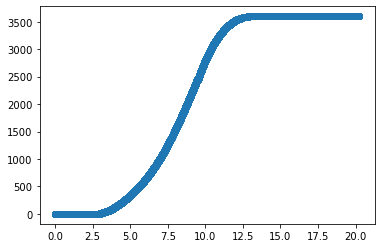

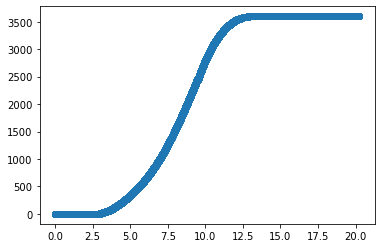

In [28]:
plt.scatter(x[:,1],y)

In [29]:
'''
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x
'''

'\nfrom sklearn.preprocessing import StandardScaler\nsc=StandardScaler()\nx=sc.fit_transform(x)\nx\n'

'\nfrom sklearn.preprocessing import StandardScaler\nsc=StandardScaler()\nx=sc.fit_transform(x)\nx\n'

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(criterion="mae",random_state=0)
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mae', random_state=0)

DecisionTreeRegressor(criterion='mae', random_state=0)

In [32]:
y_pred_decision=dt.predict(x_test)
y_pred_decision

array([ 201.40400275,  976.70665398, 1797.19624322, ...,  109.94596363,
       3600.        , 3586.41732691])

array([ 201.40400275,  976.70665398, 1797.19624322, ...,  109.94596363,
       3600.        , 3586.41732691])

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_decision)

0.9999999900131041

0.9999999900131041

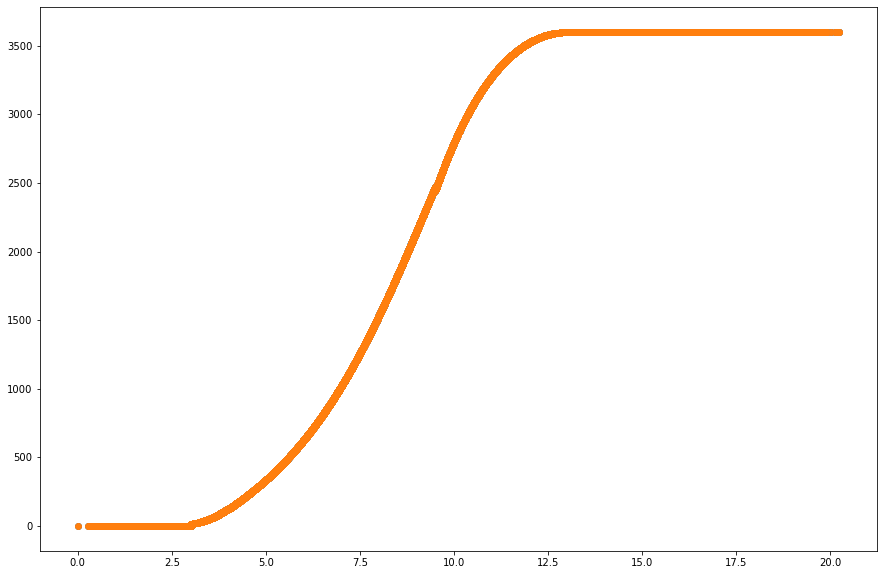

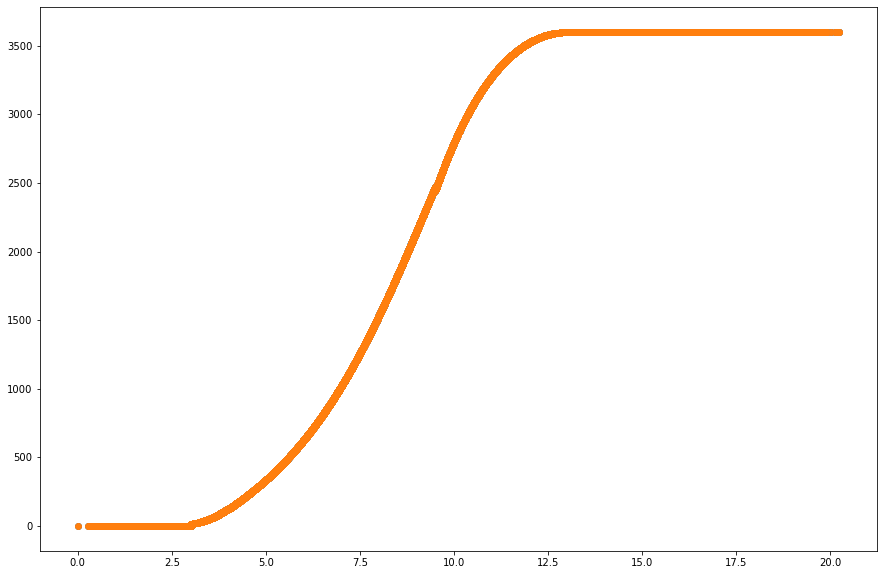

In [34]:
plt.figure(figsize=(15,10))
plt.scatter(x_test[:,1],y_test)
plt.scatter(x_test[:,1],y_pred_decision)

In [35]:
"""
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data= StringIO()
export_graphviz(dt,out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
"""

'\nfrom six import StringIO\nfrom IPython.display import Image\nfrom sklearn.tree import export_graphviz\nimport pydotplus\ndot_data= StringIO()\nexport_graphviz(dt,out_file=dot_data,\n               filled=True, rounded=True,\n               special_characters=True)\ngraph=pydotplus.graph_from_dot_data(dot_data.getvalue())\nImage(graph.create_png())\n'

'\nfrom six import StringIO\nfrom IPython.display import Image\nfrom sklearn.tree import export_graphviz\nimport pydotplus\ndot_data= StringIO()\nexport_graphviz(dt,out_file=dot_data,\n               filled=True, rounded=True,\n               special_characters=True)\ngraph=pydotplus.graph_from_dot_data(dot_data.getvalue())\nImage(graph.create_png())\n'

In [36]:
#import joblib
#joblib.dump(dt,'modelrf.save')

# KNN

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [38]:
knn_grid=GridSearchCV(estimator=KNeighborsRegressor(),param_grid={'n_neighbors':np.arange(1,20)},cv=5)

In [39]:
knn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [40]:
knn_grid.best_params_

{'n_neighbors': 1}

{'n_neighbors': 1}

In [41]:
knn=KNeighborsRegressor(n_neighbors=3,p=2)

In [42]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

KNeighborsRegressor(n_neighbors=3)

In [43]:
y_pred_knn=knn.predict(x_test)

In [44]:
r2_score(y_test,y_pred_knn)

0.9908394928679064

0.9908394928679064

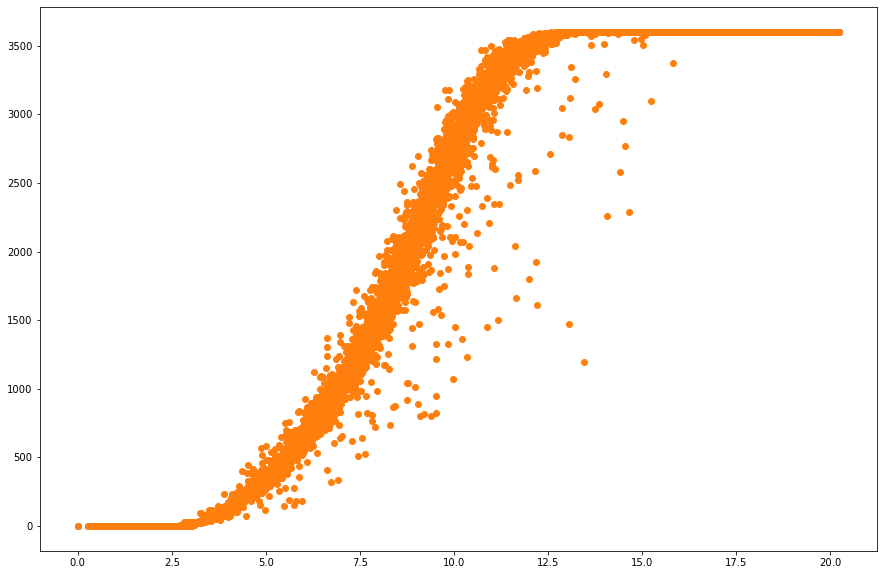

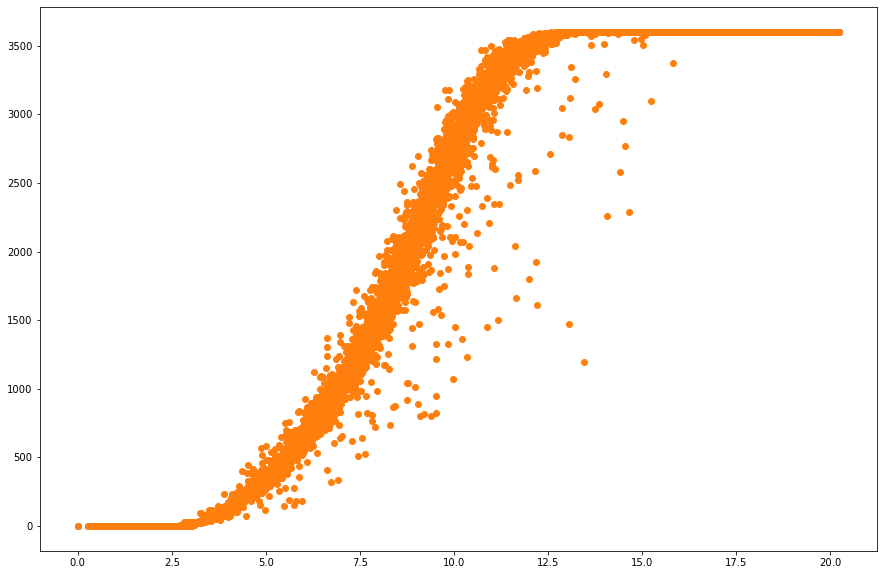

In [45]:
plt.figure(figsize=(15,10))
plt.scatter(x_test[:,1],y_test)
plt.scatter(x_test[:,1],y_pred_knn)

# Linear regression

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

LinearRegression()

### PyGam Modelling

In [47]:
!pip install pygam

In [48]:
from pygam import LinearGAM, s, f
gam = LinearGAM(s(0)).fit(x_train[:,1], y_train)


In [49]:
 pred_test = gam.predict(x_test[:,1])

In [50]:
y_pred_dt = regressor.predict(x_test)

In [51]:
r2_score(y_test,y_pred_dt)

0.9400585213177767

0.9400585213177767

In [52]:
import joblib
joblib.dump(regressor,'modellr.save')

['modellr.save']

['modellr.save']

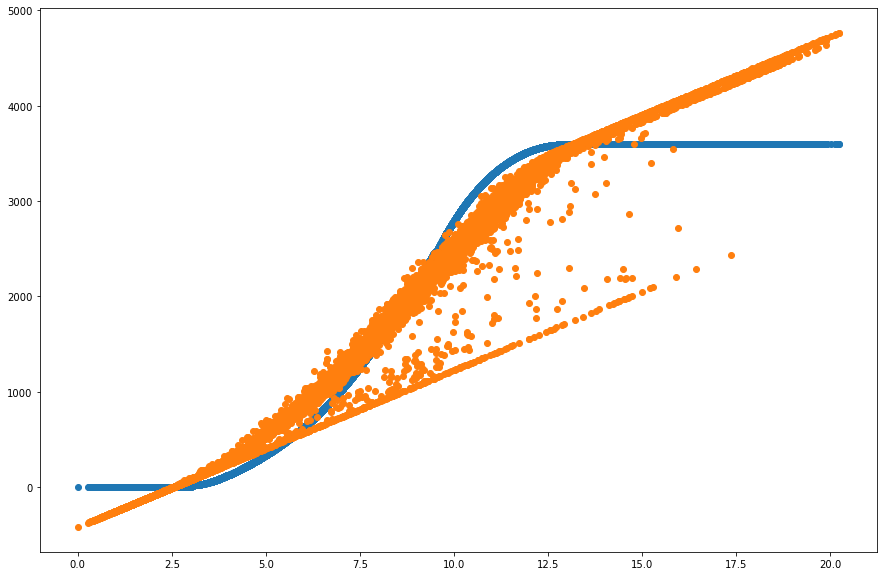

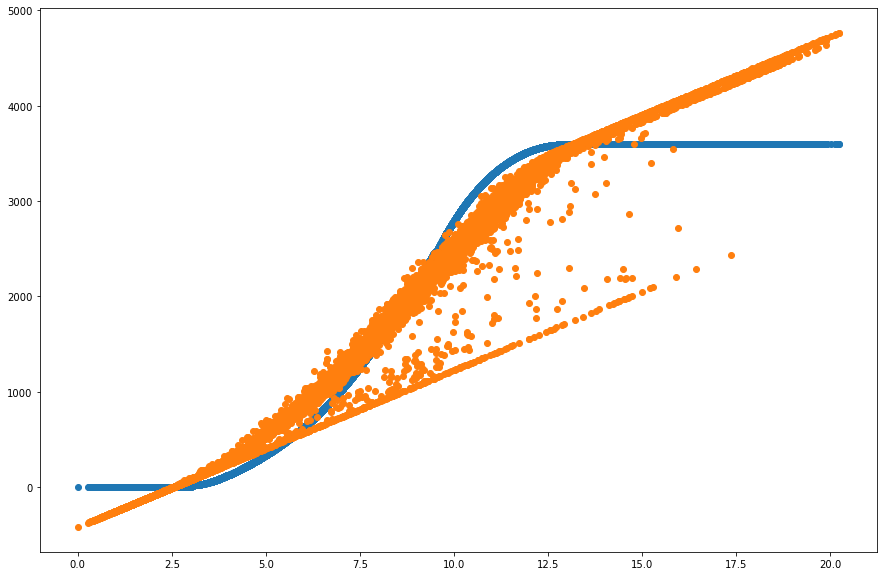

In [53]:
plt.figure(figsize=(15,10))
plt.scatter(x_test[:,1],y_test)
plt.scatter(x_test[:,1],y_pred_dt)

In [54]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     17.9636
Link Function:                     IdentityLink Log Likelihood:                                -137424.731
Number of Samples:                        40241 AIC:                                           274887.3893
                                                AICc:                                          274887.4081
                                                GCV:                                               11.6338
                                                Scale:                                             11.6244
                                                Pseudo R-Squared:                                      1.0
Feature Function                  Lam

<ipython-input-54-dec6a6acdaaa>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     17.9636
Link Function:                     IdentityLink Log Likelihood:                                -137424.731
Number of Samples:                        40241 AIC:                                           274887.3893
                                                AICc:                                          274887.4081
                                                GCV:                                               11.6338
                                                Scale:                                             11.6244
                                                Pseudo R-Squared:                                      1.0
Feature Function                  Lam

<ipython-input-54-dec6a6acdaaa>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


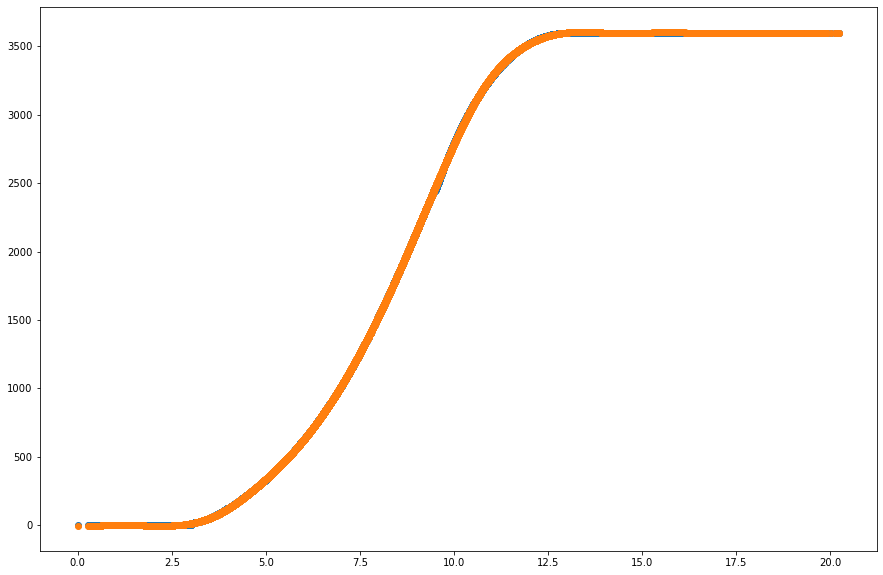

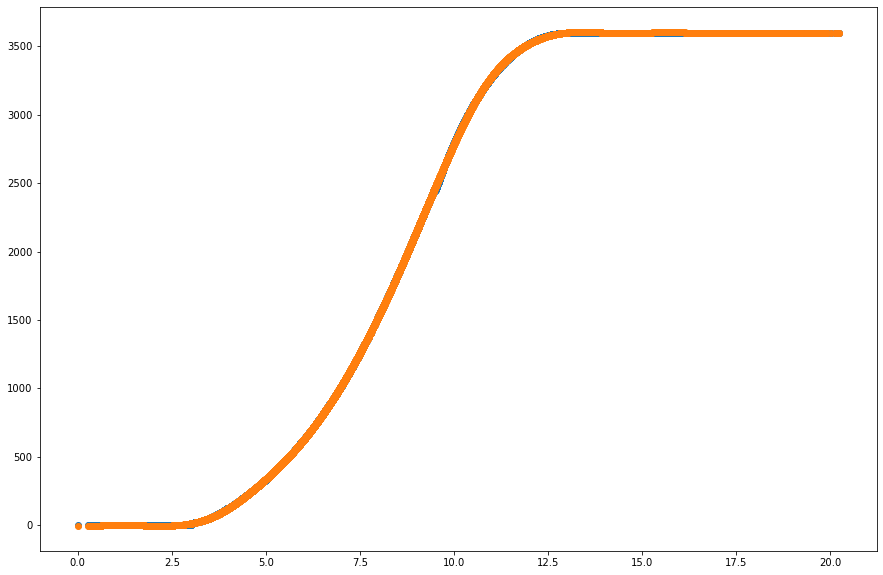

In [55]:
plt.figure(figsize=(15,10))
plt.scatter(x_test[:,1],y_test)
plt.scatter(x_test[:,1],pred_test)

# Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rf_grid=GridSearchCV(estimator=RandomForestRegressor(),param_grid={'n_estimators':np.arange(1,20),'max_depth':np.arange(2,30)},cv=5)

In [58]:
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [59]:
rf_grid.best_params_

{'max_depth': 15, 'n_estimators': 19}

{'max_depth': 15, 'n_estimators': 19}

In [60]:
rf=RandomForestRegressor(n_estimators=19,max_depth= 27)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=27, n_estimators=19)

RandomForestRegressor(max_depth=27, n_estimators=19)

In [61]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([ 201.3894313 ,  976.71262133, 1797.33033373, ...,  109.9049342 ,
       3600.        , 3586.38365791])

array([ 201.3894313 ,  976.71262133, 1797.33033373, ...,  109.9049342 ,
       3600.        , 3586.38365791])

In [62]:
r2_score(y_test,y_pred_rf)

0.9999999891558706

0.9999999891558706

In [63]:
#import joblib
#joblib.dump(regressor,'modelrf.save')

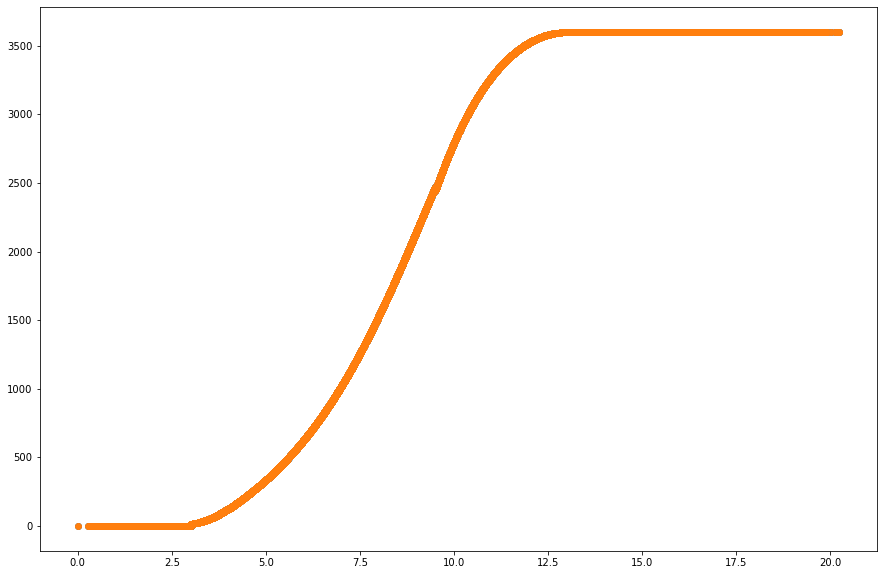

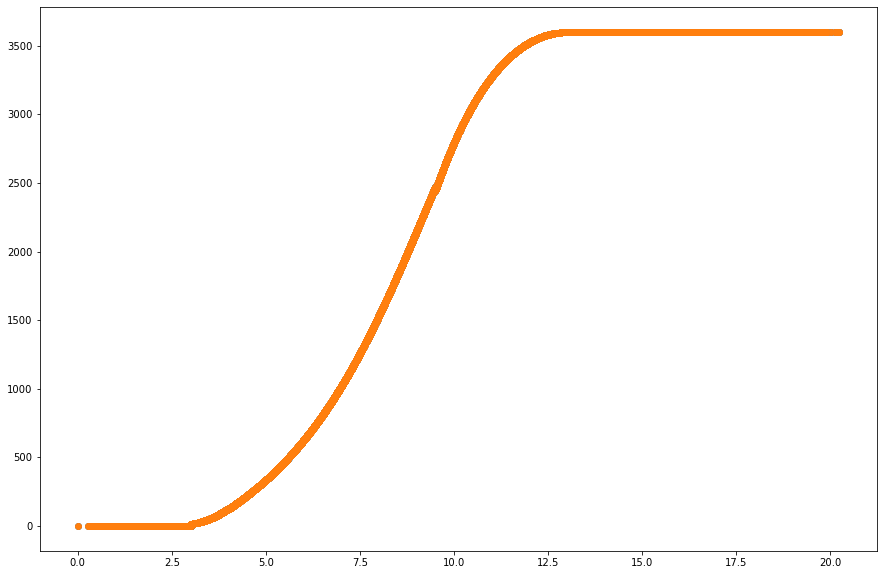

In [64]:
plt.figure(figsize=(15,10))
plt.scatter(x_test[:,1],y_test)
plt.scatter(x_test[:,1],y_pred_rf)

In [65]:
rf.predict(x_test)

array([ 201.3894313 ,  976.71262133, 1797.33033373, ...,  109.9049342 ,
       3600.        , 3586.38365791])

array([ 201.3894313 ,  976.71262133, 1797.33033373, ...,  109.9049342 ,
       3600.        , 3586.38365791])

In [67]:
import joblib
joblib.dump(rf,'modelrf.save')

['modelrf.save']

['modelrf.save']